# Ejercicio 1. Estado estacionario y tiempo medio de retorno  
## Dinámica poblacional (Cadena de Markov y Python – replicado y explicado)

---

## (a) Expresión de la dinámica como cadena de Markov

La dinámica de la población de Mobile se modela como una **cadena de Markov** en 3 estados:
- Rural (R)
- Suburbano (S)
- Citadino (C)

La **matriz de transición** $P$ (donde la fila $i$ indica la probabilidad de moverse del estado $i$ a cada estado destino) es:

$$
P =
\begin{array}{c@{\,}c}
& \begin{matrix} \text{R} & \text{S} & \text{C} \end{matrix} \\[5pt]
\begin{matrix} \text{R} \\ \text{S} \\ \text{C} \end{matrix}
&
\begin{pmatrix}
0.85 & 0.10 & 0.05 \\
0.30 & 0.55 & 0.15 \\
0.20 & 0.00 & 0.80
\end{pmatrix}
\end{array}
$$
---

## (b) Distribución de la población en 10 y 20 años

El vector de población inicial es:
$$
\text{Población inicial} = [20000,\ 100000,\ 30000]
$$
Esto corresponde a Rurales, Suburbanos y Citadinos respectivamente.

La distribución poblacional tras $n$ periodos se obtiene por:
$$
\text{Población en } n \text{ años} = \text{Población inicial} \cdot P^n
$$

---

### Código Python para los incisos (a) y (b):



In [ ]:
# (a) y (b) Resolución en Python
import numpy as np

# Matriz de transición
P = np.array([
    [0.85, 0.10, 0.05],
    [0.30, 0.55, 0.15],
    [0.20, 0.00, 0.80]
])

# Vector de población inicial: [Rural, Suburbano, Citadino]
v0 = np.array([[20000, 100000, 30000]])  # vector fila

def poblacion_en_n_periodos(P, v0, n):
    Pn = np.linalg.matrix_power(P, n)
    return v0 @ Pn

v10 = poblacion_en_n_periodos(P, v0, 10)
v20 = poblacion_en_n_periodos(P, v0, 20)

print("Población en 10 años:", np.round(v10, 1))
print("Población en 20 años:", np.round(v20, 1))
print('Recuerda dar la interpretación de los resultados\n hazlo en bloque de texto abajo de este codigo')

Población en 10 años: [[90944.2 20075.  38980.7]]
Población en 20 años: [[91507.4 20327.9 38164.7]]
Recuerda dar la interpretación de los resultados
 hazlo en bloque de texto abajo de este codigo


## (c) Estado estacionario — resumen teórico aplicado al ejercicio

Para encontrar la distribución de equilibrio a largo plazo (estado estacionario), buscamos el vector $\pi = [\pi_R, \pi_S, \pi_C]$ que representa la proporción de la población en cada estado una vez que las transiciones han ocurrido muchas veces.

---
### 1. Ecuación de equilibrio para la dinámica poblacional

Para la dinámica de la ciudad, el estado estacionario $\pi$ cumple:
$$
\pi P = \pi
$$
Esto significa que si la distribución de población es $\pi$, después de otra transición la distribución sigue siendo la misma.
El sistema de ecuaciones para encontrar el vector estacionario $\pi = [\pi_R,\ \pi_S,\ \pi_C]$ del ejercicio de dinámica poblacional es:

$$
\begin{bmatrix}
\pi_R & \pi_S & \pi_C
\end{bmatrix}
\begin{bmatrix}
0.85 & 0.10 & 0.05 \\
0.30 & 0.55 & 0.15 \\
0.20 & 0.00 & 0.80 \\
\end{bmatrix}
=
\begin{bmatrix}
\pi_R & \pi_S & \pi_C
\end{bmatrix}
$$


O en forma de matriz:

$$
\begin{bmatrix}
-0.15 & 0.30 & 0.20 \\
0.10 & -0.45 & 0.00 \\
1 & 1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
\pi_R \\
\pi_S \\
\pi_C \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
1 \\
\end{bmatrix}
$$

---
Podemos hacer el despeje directo en python si reordenamos la ecuación, así como lo hicimos en el notebook pasado.


### 2. Recuerden que necesitamos Formular del sistema lineal de manera especial en python

Restando $\pi$ del lado derecho y factorizando:
$$
\pi P - \pi = 0
\implies
\pi (P - I) = 0
$$
donde $I$ es la matriz identidad de tamaño $3 \times 3$.

---

### 3. Adaptación matricial para Python

Como en NumPy los sistemas lineales se resuelven en notación de vectores columna, transponemos la ecuación:
$$
(P^T - I)\ \pi^T = 0
$$
De este modo, la matriz de coeficientes $A$ es $(P^T - I)$ y el vector incógnita es $\pi$ columna.

---

### 4. Normalización y sistema final

El sistema homogéneo anterior tiene infinitas soluciones proporcionales, así que **reemplazamos la última fila** de $A$ por $[1, 1, 1]$, y la última entrada del vector del lado derecho por $1$, imponiendo la condición:
$$
\pi_R + \pi_S + \pi_C = 1
$$

Así, el sistema a resolver es:
$$
A\,\pi^T = b
$$
donde:
- $A$ es $(P^T - I)$ con la última fila sustituida por $[1, 1, 1]$,
- $b$ es $\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$

---

**Esto asegura que la solución encontrada es la distribución estacionaria normalizada para la cadena de Markov del problema de población.**

---
Lo único que tenemos que agregar es la creación de la matriz Identidad (I) para replicar la formulación anterior.

In [ ]:
# Creamos la matriz identidad de tamaño 3x3:
I = np.eye(3)
# Con esto, ya tenemos nuestra matriz A anteriormente definida
A = P.T - I

A




array([[-0.15,  0.3 ,  0.2 ],
       [ 0.1 , -0.45,  0.  ],
       [ 0.05,  0.15, -0.2 ]])

Al añadir el vector de incognitas del estado estacionario, se produce el siguiente sistema:

$$
\begin{cases}
0.85\pi_R + 0.30\pi_S + 0.20\pi_C = \pi_R \\
0.10\pi_R + 0.55\pi_S + 0.00\pi_C = \pi_S \\
0.05\pi_R + 0.15\pi_S + 0.80\pi_C = \pi_C \\
\pi_R + \pi_S + \pi_C = 1
\end{cases}
$$

Restando las incógnitas del lado derecho y quitando una ecuación dependiente, queda el sistema reducido:

$$
\begin{align*}
-0.15\pi_R + 0.30\pi_S + 0.20\pi_C &= 0 \\
0.10\pi_R - 0.45\pi_S + 0.00\pi_C &= 0 \\
\pi_R + \pi_S + \pi_C &= 1
\end{align*}
$$

El sistema matricial del equilibrio poblacional, con sus componentes identificados, se expresa así:

$$
\underbrace{
\begin{bmatrix}
-0.15 & 0.30 & 0.20 \\
0.10 & -0.45 & 0.00 \\
1 & 1 & 1
\end{bmatrix}
}_{\text{Matriz de coeficientes } A}
\underbrace{
\begin{bmatrix}
\pi_R \\
\pi_S \\
\pi_C
\end{bmatrix}
}_{\text{Vector de incógnitas } \pi}
=
\underbrace{
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
}_{\text{Vector de resultados } b}
$$

Hacemos esto en python:

In [ ]:
# Sustituimos la última ecuación por la de normalización π₁ + π₂ + π₃ = 1
A[-1] = [1, 1, 1]
A

array([[-0.15,  0.3 ,  0.2 ],
       [ 0.1 , -0.45,  0.  ],
       [ 1.  ,  1.  ,  1.  ]])

In [ ]:
# OPCIONAL: tambien lo puedes hacer manual, pero es mejor que lo haga python por tí y tu
# solo le das la instrucción.
#A = np.array([
    #[-0.15, 0.30, 0.20],
    #[ 0.10, -0.45, 0.00],
    #[ 1.00,  1.00, 1.00]
#])
# creamos la variable que contine nuestro vector de resultados
b = np.array([0, 0, 1])

# Calculamos el determinante de A para verificar si es invertible y resolvemos de una vez
# en el mismo bloque condicional.
detA = np.linalg.det(A)
print("Determinante de A:", detA)

if np.abs(detA) > 1e-10:#si se cumple la condición entonces ES OTRA MANERA DE HACERLO PERO PUEDEN HACER IGUAL QUE EN EL OTRO NOTEBOOK ->
    pi = np.linalg.solve(A, b) # resolvemos el sistema de ecuaciones.
    print("Distribución estacionaria π:", np.round(pi, 6))
else:#sino existe el determinante, no hay matriz inversa, y por tanto, no podemos resolver el sistema (al menos con una única solución)
    print("La matriz A no es invertible; no hay solución única para el estado estacionario.")


Determinante de A: 0.14750000000000002
Distribución estacionaria π: [0.610169 0.135593 0.254237]


## (d) Tiempo medio de retorno para cada estado

El tiempo medio de retorno para cada estado es:

$$
\mu_i = \frac{1}{\pi_i}
$$

El inverso de cada estado estacionario.

---

En python:

In [ ]:
# Cálculo del tiempo medio de retorno (simplificado)
tiempos_retorno = 1 / pi

print("\nTiempos medios de retorno para cada estado (en períodos de 10 años):")
print(f"Rural (R):     {tiempos_retorno[0]:.3f}") # se le llama f-string es un string pero más guapo.
print(f"Suburbano (S): {tiempos_retorno[1]:.3f}")
print(f"Citadino (C):  {tiempos_retorno[2]:.3f}")



Tiempos medios de retorno para cada estado (en períodos de 10 años):
Rural (R):     1.639
Suburbano (S): 7.375
Citadino (C):  3.933


## Visualización sencilla

Podemos visualizar la proporción poblacional en cada estado a través del tiempo.

---


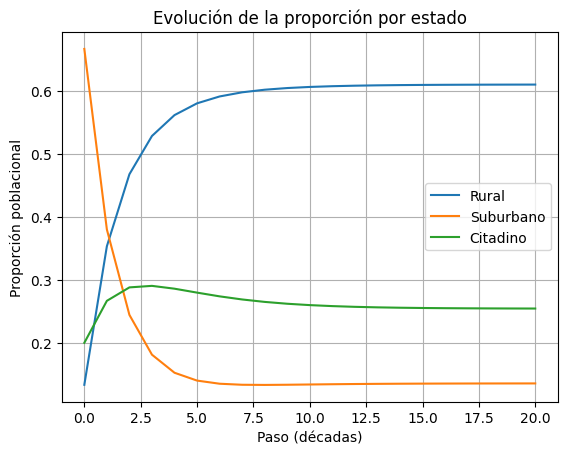

In [ ]:
import matplotlib.pyplot as plt

def evolucion_proporciones(P, v0, pasos):
    historia = [v0.flatten() / np.sum(v0)]
    v = v0.copy()
    for _ in range(pasos):
        v = v @ P
        historia.append(v.flatten() / np.sum(v))
    return np.array(historia)

historia = evolucion_proporciones(P, v0, 20)
plt.plot(historia)
plt.xlabel("Paso (décadas)")
plt.ylabel("Proporción poblacional")
plt.title("Evolución de la proporción por estado")
plt.legend(['Rural','Suburbano','Citadino'])
plt.grid(True)
plt.show()
